In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px

Call The DataSets

In [2]:
df = pd.read_csv("Unemployment in India.csv")


In [3]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [7]:
df.shape

(768, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


Data Preprocessing

In [17]:
df.dropna(inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [23]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [30]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [44]:
df.rename(columns=lambda x: x.strip(), inplace=True)


In [46]:
# Convert 'Date' column to datetime format, handling errors safely
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract day, month, and year from the 'Date' column
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year

# Display the first few rows to verify the changes
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,31,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,30,June,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,31,July,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,31,August,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,30,September,2019


In [47]:
df.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Day,Year
count,740,740.000000,7.400000e+02,740.000000,740.000000,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122,30.502703,2019.418919
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000,29.000000,2019.000000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500,30.000000,2019.000000
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000,31.000000,2019.000000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000,31.000000,2020.000000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000,31.000000,2020.000000
std,NaN,10.721298,8.087988e+06,8.111094,0.627509,0.493716


In [59]:
mean_unemployment = df['Estimated Unemployment Rate (%)'].median()

In [60]:
print(mean_unemployment)

8.35


Step 1: Define Unemployment Rate

The unemployment rate is the percentage of unemployed individuals in the total labor force.

In [62]:
mean_unemployment_time = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

In [63]:
print(mean_unemployment_time)

Date
2019-05-31     8.874259
2019-06-30     9.303333
2019-07-31     9.033889
2019-08-31     9.637925
2019-09-30     9.051731
2019-10-31     9.900909
2019-11-30     9.868364
2019-12-31     9.497358
2020-01-31     9.950755
2020-02-29     9.964717
2020-03-31    10.700577
2020-04-30    23.641569
2020-05-31    24.875294
2020-06-30    11.903600
Name: Estimated Unemployment Rate (%), dtype: float64


In [64]:
plt.figure(figsize(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

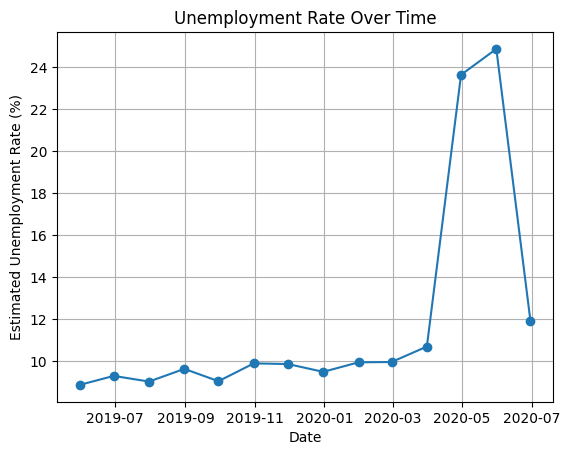

In [69]:
plt.plot(mean_unemployment_time.index,mean_unemployment_time.values , marker = 'o' )

plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.grid(True)

plt.show()

The plot shows spikes in unemployment rates surpassing 20% in November and December 2019, with another peak occurring in February 2020.

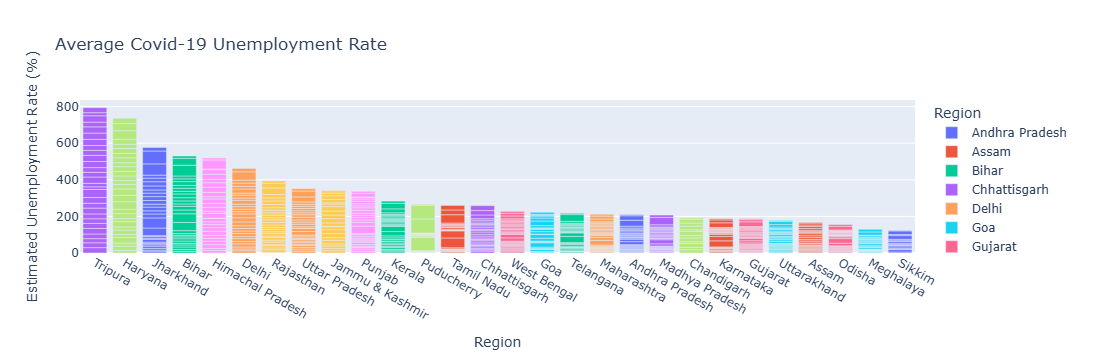

In [77]:
fig = px.bar(df, x = 'Region', y= 'Estimated Unemployment Rate (%)', color = 'Region', title = 'Average Covid-19 Unemployment Rate')
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

Region with the highest  Covid-19 Unemployment rate is Tripura.

In [78]:
# Bar Plot of Estimated Unemployed people in every month

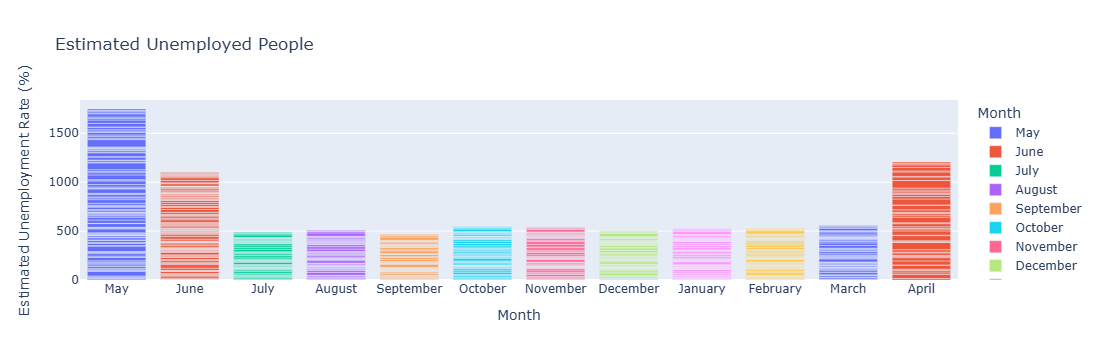

In [80]:
fig = px.bar(df,x = 'Month', y = 'Estimated Unemployment Rate (%)', color = 'Month', title = 'Estimated Unemployed People')
fig.show()

The number of unemployed people was highest in May during COVID-19.

In [81]:
 # Bar Plot of Estimated Employed people in every month

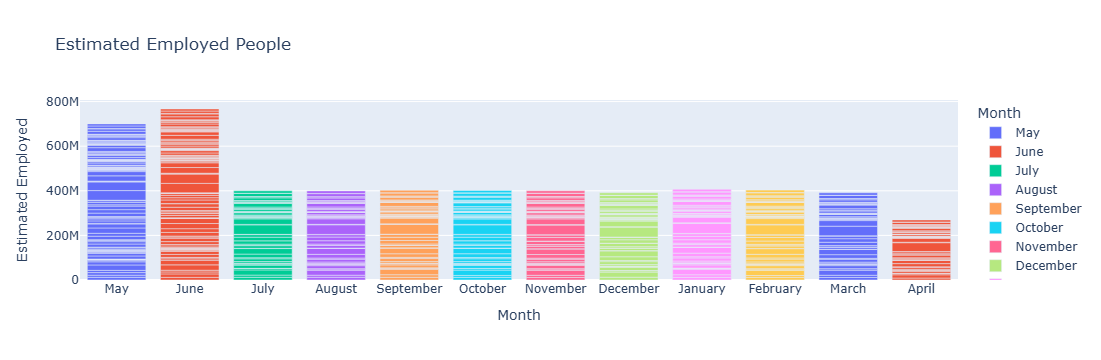

In [82]:
fig = px.bar(df,x = 'Month', y = 'Estimated Employed', color = 'Month', title = 'Estimated Employed People')
fig.show()

The number of Employed people was highest in June during COVID-19

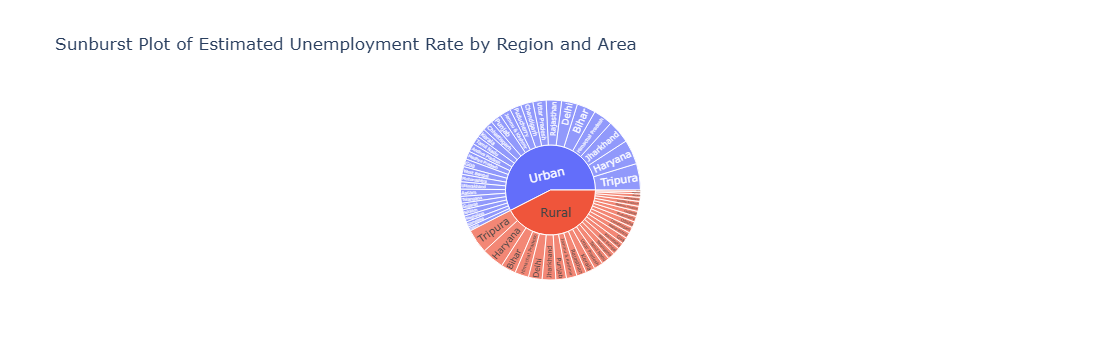

In [84]:
fig = px.sunburst(df, path=['Area', 'Region'], values='Estimated Unemployment Rate (%)', title='Sunburst Plot of Estimated Unemployment Rate by Region and Area')
fig.show()

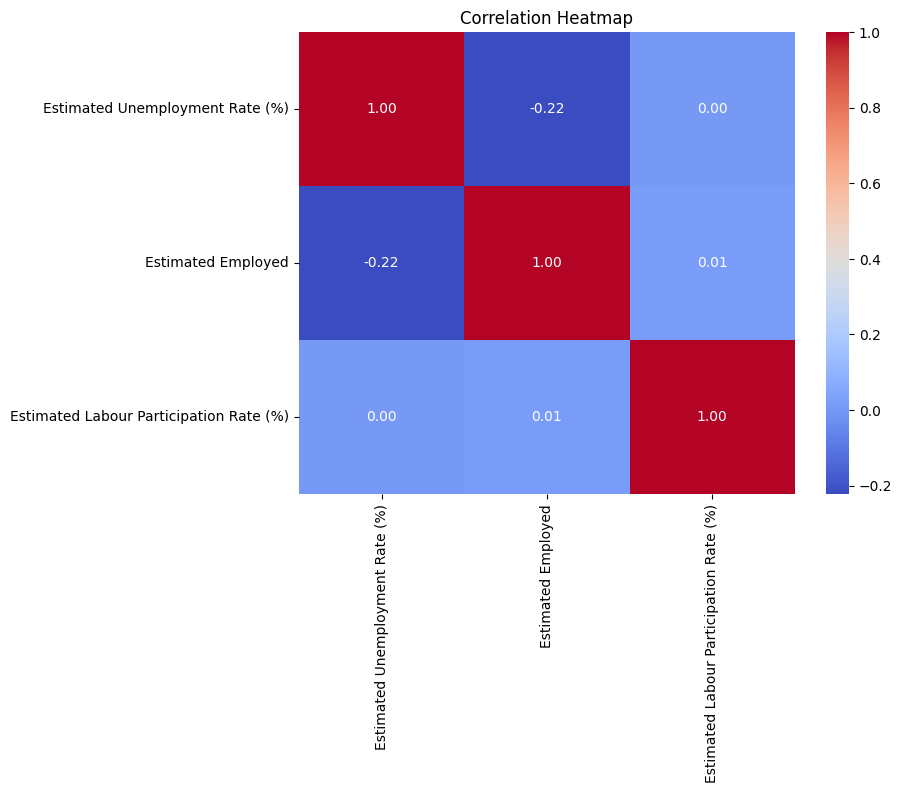

In [85]:
# Calculate correlation matrix
correlation = df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

1.When unemployment rates go up, the number of employed people tends to go down, showing an opposite relationship.

2.Changes in unemployment rates don't have much effect on how many people are participating in the job market overall.

3.More people having jobs might slightly increase the number of people willing to work, but the effect isn't very strong.

Conclusion:



The analysis of unemployment trends during COVID-19 highlights key patterns in employment and workforce participation. Unemployment rates saw sharp spikes, exceeding 20% in November and December 2019, with another peak in February 2020. Among all regions, Tripura faced the highest unemployment rate, indicating a significant impact on its workforce.

During the pandemic, May recorded the highest number of unemployed people, while June saw the highest number of employed individuals, suggesting a possible recovery phase. The data also shows that when unemployment increases, employment decreases, confirming an opposite relationship between the two. However, overall labor force participation remained stable, meaning people continued to seek jobs despite fluctuations in unemployment.

Although more people getting jobs might encourage others to join the workforce, this effect is not very strong. These insights can help businesses and policymakers understand economic shifts, plan workforce strategies, and create better employment opportunities for future stability.